In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [2]:
data = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [5]:
pos_df = df[df["target"] == 1]
neg_df = df[df["target"] == 0]

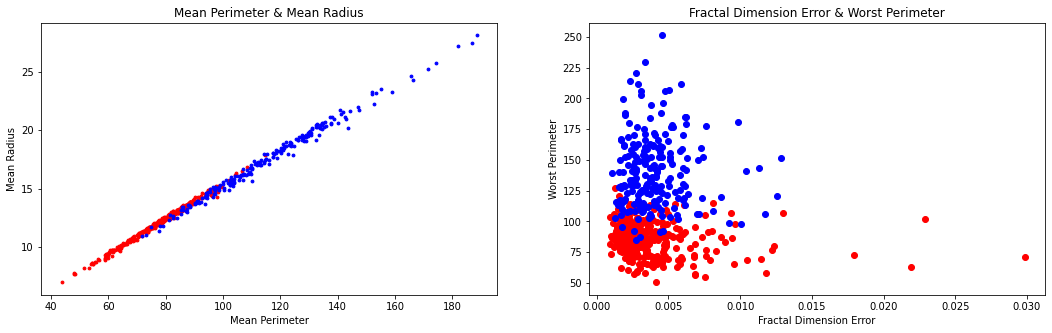

In [7]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.scatter(pos_df["mean perimeter"], pos_df["mean radius"], color ="red", s= 8)
plt.scatter(neg_df["mean perimeter"], neg_df["mean radius"], color = "blue",s = 8)
#plt.scatter(df["mean perimeter"], df["mean radius"], color ="red", s= 8)
plt.title("Mean Perimeter & Mean Radius")
plt.xlabel('Mean Perimeter')
plt.ylabel('Mean Radius')


plt.subplot(1,2,2)
plt.scatter(pos_df["fractal dimension error"], pos_df["worst perimeter"], color ="red")
plt.scatter(neg_df["fractal dimension error"], neg_df["worst perimeter"], color = "blue")
#plt.scatter(df["fractal dimension error"], df["worst perimeter"], color ="red")
plt.title("Fractal Dimension Error & Worst Perimeter")
plt.xlabel('Fractal Dimension Error')
plt.ylabel('Worst Perimeter')



plt.show()

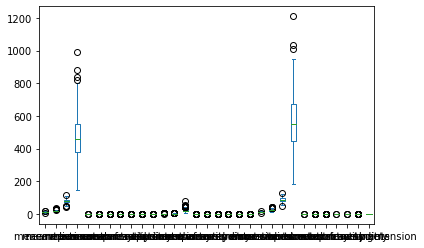

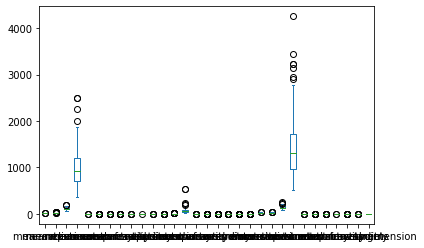

In [8]:
pos_df.plot.box()
neg_df.plot.box()

In [9]:
train_df, test_df = train_test_split(df) 
display(train_df.head(5))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
537,11.690,24.44,76.37,406.4,0.12360,0.15520,0.04515,0.04531,0.2131,0.07405,...,32.19,86.12,487.7,0.1768,0.32510,0.13950,0.13080,0.2803,0.09970,1.0
404,12.340,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,0.05708,...,16.85,84.11,533.1,0.1048,0.06744,0.04921,0.04793,0.2298,0.05974,1.0
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.23780,0.26710,0.10150,0.3014,0.08750,1.0
355,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,...,22.43,89.02,547.4,0.1096,0.20020,0.23880,0.09265,0.2121,0.07188,1.0
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,...,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178,1.0


In [10]:
dt = DecisionTreeClassifier( max_depth = 10)
dt.fit(train_df.drop('target', axis=1), train_df['target'])   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(max_depth=10)

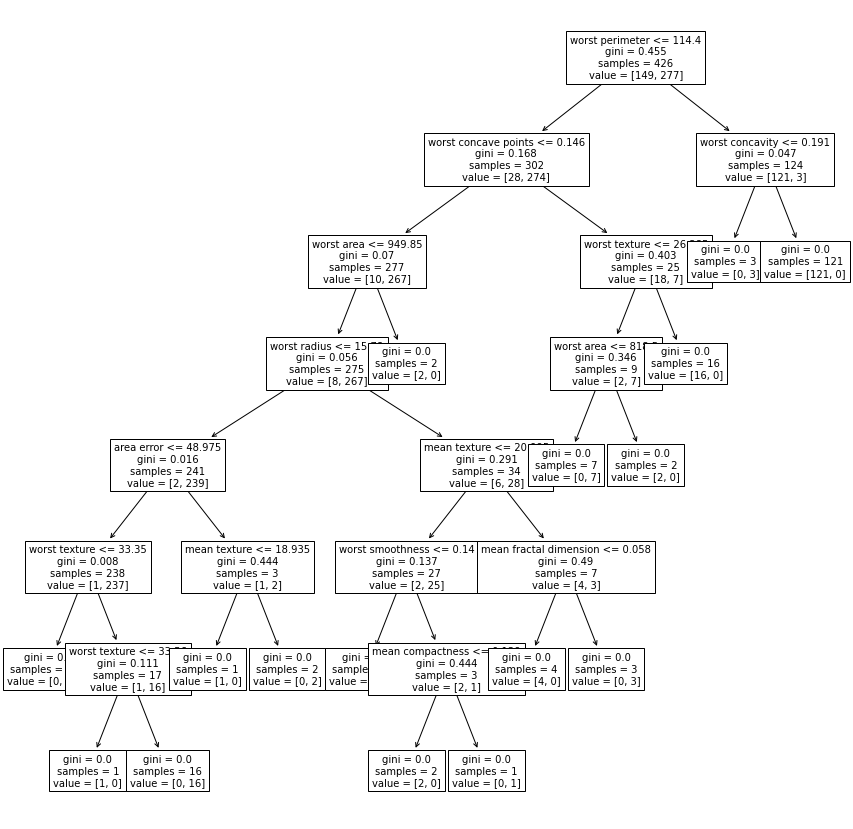

In [11]:
from sklearn import tree as tr
plt.figure(figsize=(15,15))
tr.plot_tree(dt, feature_names=data['feature_names'], fontsize=10)
plt.show()

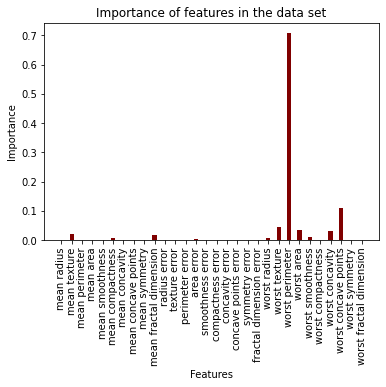

In [12]:
x= np.array(list(data['feature_names']))
y = dt.feature_importances_
plt.bar(x, y, color ='maroon', width = 0.4)
 
plt.xlabel("Features")
plt.xticks(rotation=90)

plt.ylabel("Importance")
plt.title("Importance of features in the data set")
plt.show()

In [13]:
new_order = np.lexsort([x, y])
y = y[new_order]
x = x[new_order]
num = len(x)
for i in range(5):

  feature_name = x[num-1]
  print("Most important feature number {}: {}".format(i,feature_name))
  num -=1

Most important feature number 0: worst perimeter
Most important feature number 1: worst concave points
Most important feature number 2: worst texture
Most important feature number 3: worst area
Most important feature number 4: worst concavity


In [14]:
X = pd.DataFrame(data=np.c_[data['data']])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score
y_ds = dt.predict(X_test)
y_lr = lr.predict(X_test)
print("Decision Tree Accuracy:{}".format(accuracy_score(y_test, y_ds)))
print("Logistic Regression Accuracy : {}".format(accuracy_score(y_test, y_lr)))

Decision Tree Accuracy:0.972027972027972
Logistic Regression Accuracy : 0.958041958041958


In [17]:
print(dt.score(X_test,y_test))
print(lr.score(X_test,y_test))

0.972027972027972
0.958041958041958


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.
- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [18]:
from google.colab import files 
uploaded = files.upload()

Saving winequality_white.csv to winequality_white.csv


In [20]:
df = pd.read_csv("winequality_white.csv", sep = ";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
x= df.loc[:, df.columns != 'quality']
y = df["quality"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

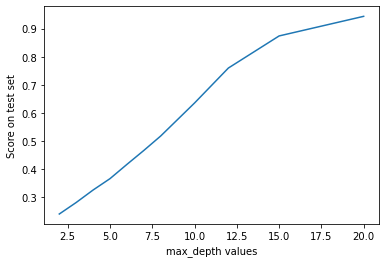

In [24]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
errors = np.zeros(11)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(df.drop('quality',axis=1),df['quality'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(df.drop('quality',axis=1), df['quality'])
    errors[index]=u
    index+=1

x1 = np.array(range(0,11))
plt.plot(mdepths, errors)
plt.xlabel('max_depth values')
plt.ylabel('Score on test set')
plt.show()

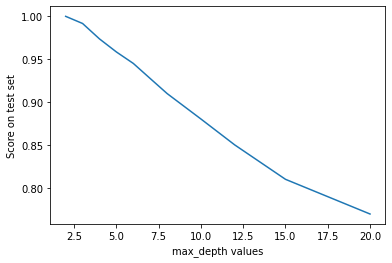

In [25]:
min_split = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
errors2 = np.zeros(11)
index2=0

for d in min_split:
    tree_reg = DecisionTreeRegressor(min_samples_split=d)
    tree_reg.fit(df.drop('quality',axis=1),df['quality'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(df.drop('quality',axis=1), df['quality'])
    errors2[index2]=u
    index2+=1

x = np.array(range(0,11))
plt.plot(mdepths, errors2)
plt.xlabel('max_depth values')
plt.ylabel('Score on test set')
plt.show()

In [26]:
dt1 = DecisionTreeRegressor(max_depth=20)
dt1.fit(X_train, y_train)
y_predict1 = dt1.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error as MSE

mse = MSE(y_predict1, y_test)
print("MSE Score of max_depth trial : {:.2f}".format(mse))

MSE Score  : 0.80


In [28]:
dt2 = DecisionTreeRegressor(min_samples_split=2)
dt2.fit(X_train, y_train)
y_predict2 = dt2.predict(X_test)

In [29]:
mse = MSE(y_predict2, y_test)
print("MSE Score of min_sample_split trial : {:.2f}".format(mse))

MSE Score  : 0.82


-As shown above, as max_depth increases, the model's score increases. min_samples_split works in the opposite way. As the number of min_splits increases, the success rate of the model decreases.

-When we get the best values of the parameters, the mse score is quite close to each other. It may not be right to say this one is better, but from what I've researched on the internet, the general comment is that it's healthier to change the max_depth value than to change the min_samples_split value to train the model.